In [62]:
import pandas as pd
from matplotlib import pyplot as plt

In [63]:
df=pd.read_csv('data/survey_results_public.csv', index_col='ResponseId')
sdf=pd.read_csv('data/survey_results_schema.csv',index_col='qname')

### Compare Salary(avg) by years of experience

In [64]:
exp=df.groupby('YearsCode')['CompTotal'].median()
exp=pd.DataFrame(exp)
exp.reset_index(inplace=True)

In [65]:
exp.replace(['Less than 1 year'],0,inplace=True)
exp.replace(['More than 50 years'],51,inplace=True)

In [66]:
exp['YearsCode']=exp['YearsCode'].astype(float)
exp.sort_values('YearsCode',axis=0,ascending=True,inplace=True)

In [67]:
xx=exp['YearsCode'].tolist()
yy=exp['CompTotal'].tolist()
xx.sort()

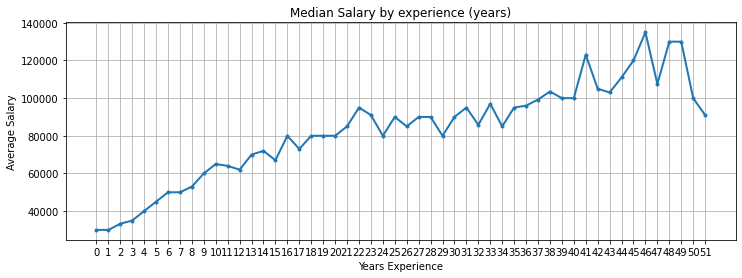

In [68]:
plt.figure(figsize=(12,4))
plt.xlabel('Years Experience')
plt.ylabel('Average Salary')
plt.xticks(xx)
plt.title('Median Salary by experience (years)')
plt.grid(which='major')
plt.plot(xx,yy,linewidth=2,marker='.')
plt.show()

### Compare Salary by Degree

In [69]:
ed_df=df.groupby('EdLevel')['CompTotal'].median()
ed_df=pd.DataFrame(ed_df)
ed_df.reset_index(inplace=True)

In [70]:
#sort by ascending CompTotal
ed_df.sort_values(by='CompTotal',axis=0,ascending=True,inplace=True)
ed_df.reset_index(drop=True,inplace=True)

In [71]:
#Simplify Degree Names

degree_list=[]
for i in ed_df['EdLevel'].tolist():
    k=i.split(' ')
    i=k[0]+' '+k[1]
    degree_list.append(i)


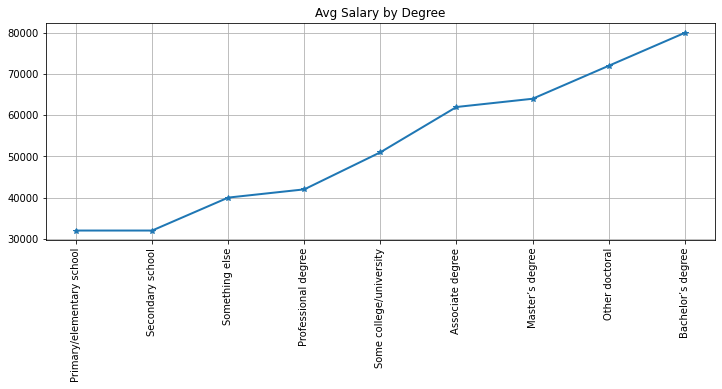

In [72]:
plt.figure(figsize=(12,4))
plt.grid()
plt.xticks(rotation=90)
plt.title('Avg Salary by Degree')
plt.plot(degree_list,ed_df['CompTotal'],linewidth=2,marker='*')
plt.show()

### Salary comparison for different programming languages

In [73]:
df['LanguageHaveWorkedWith']=df['LanguageHaveWorkedWith'].astype('str')

In [74]:
langs=['Python','Java','C++','JavaScript','PHP','SQL','Swift']
res={}
for i in langs:
    filt=df['LanguageHaveWorkedWith'].apply(lambda x : i.lower() in x.lower())
    df.loc[filt,['CompTotal']]=df.loc[filt,['CompTotal']].astype(float)
    median_salary=df.loc[filt,['CompTotal']].median()
    res[i]=median_salary[0] #update dictionary

[]

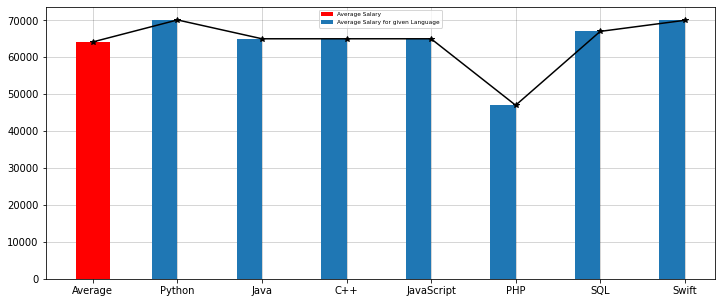

In [86]:
#all_average=(list(res.keys).sum()) / (list(res.keys).len)
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(12,5))
plt.grid(color="black", alpha=0.2) # alpha sets transparency
xx=list(res.keys())
xx.insert(0,'Average')
yy=list(res.values())
yy.insert(0,sum(yy)/len(yy))
plt.bar(xx[0],yy[0],width=0.4,color='red',label='Average Salary')
plt.bar(xx[1:len(xx)],yy[1:len(yy)],width=-0.3,label='Average Salary for given Language',align='edge')
plt.plot(xx,yy,color='Black',marker='*')
#plt.bar(xx,[sum(yy)/len(yy)],label='Average salary',width=0.3,align='edge',color='grey')
plt.legend(loc='best',fontsize='xx-small')
plt.plot()
